In [12]:
import cv2
from matplotlib import pyplot as plt

In [13]:
def show_images(inp_img, out_img):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(inp_img, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
    plt.title('Output Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def save_image(img):
   cv2.imwrite('../data/out_images/cartoon3_result.png', img)

In [14]:
# Load the image
image_path = "../data/inp_images/tower.jpeg"
image = cv2.imread(image_path)

In [15]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [17]:
# Perform edge detection
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

In [18]:
# Invert the edges image
edges_inv = cv2.bitwise_not(edges)

In [19]:
def reduce_color_depth(img, levels=10):
    # Reduce the number of colors in the image
    factor = 255 // (levels - 1)
    return (img // factor) * factor

In [20]:
# Reduce color depth
reduced_color = reduce_color_depth(image)

In [21]:
# Combine the edge image with the reduced color image
cartoon = cv2.bitwise_and(reduced_color, reduced_color, mask=edges_inv)

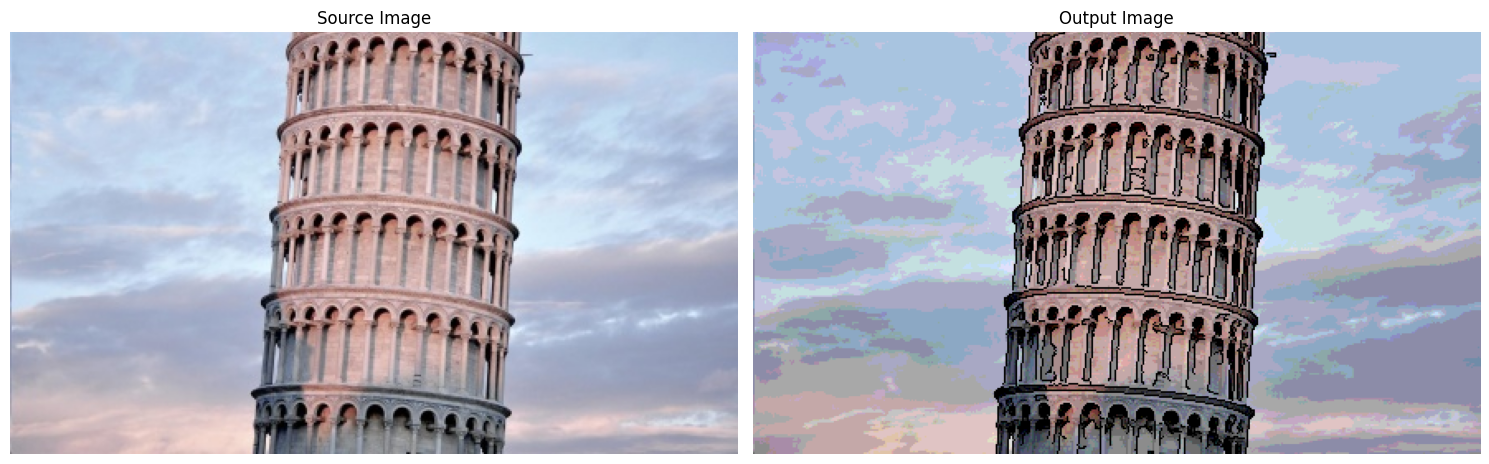

In [22]:
show_images(image, cartoon)
save_image(cartoon)